In [627]:
import numpy as np
import numpy.linalg as la
from matplotlib.pyplot import plot
import matplotlib.pyplot as plt

In [702]:
def theta(k,g):
    return np.arctan2(np.sin(k),( np.cos(k) - g))
def theta_k(k,g):
    return np.arctan2(-np.sin(k), g - np.cos(k))

def epsilon(k,g,J=1):
    return 2*J*(1+g**2-2*g*np.cos(k))**(1/2)


In [708]:
def aa(u, v, k, n):
    """⟨c_k c_{-k}⟩ contribution: ⟨c_i c_j⟩ with n = j - i"""
    amp = 1j * u * v[::-1]
    phase = np.exp(1j * k * n)
    return np.sum(amp * phase)/L

def cc(u, v, k, n):
    """⟨c_k^† c_{-k}^†⟩ contribution: ⟨c_i^† c_j^†⟩ with n = j - i"""
    amp = -1j * np.conj(u) * np.conj(v[::-1])
    phase = np.exp(1j * k * n)
    return np.sum(amp * phase)/L


def ac(u, v, k, n):
    """⟨c_k c_k^†⟩ contribution: ⟨c_i c_j^†⟩ with n = j - i"""
    amp = np.abs(u)**2
    phase = np.exp(-1j * k * n)
    return np.sum(amp * phase)/L

def ca(u, v, k, n):
    """⟨c_k c_k⟩ contribution in real space: ⟨c_i c_j⟩ with n = j - i"""
    amp = np.abs(v)**2
    phase = np.exp(1j * k * n)
    return np.sum(amp * phase)/L
def AA(args):
    return cc(*args)+ca(*args)+ac(*args)+aa(*args)
def BB(args):
    return aa(*args)-ac(*args)-ca(*args)+cc(*args)
def AB(args):
    return -(-aa(*args)+ac(*args)-ca(*args)+cc(*args))
def BA(args):
    return -(-aa(*args)-ac(*args)+ca(*args)+cc(*args))


In [712]:
#Momentum values
L = 100
n = 1
g = 1
        
k = np.linspace(-L,L,L)/2 * (2*np.pi/L)
thetak = theta(k,g)
uk = np.cos(thetak/2)
vk = np.sin(thetak/2)
uk

array([6.12323400e-17, 1.58659638e-02, 3.17279335e-02, 4.75819158e-02,
       6.34239197e-02, 7.92499569e-02, 9.50560433e-02, 1.10838200e-01,
       1.26592454e-01, 1.42314838e-01, 1.58001396e-01, 1.73648178e-01,
       1.89251244e-01, 2.04806668e-01, 2.20310533e-01, 2.35758936e-01,
       2.51147987e-01, 2.66473814e-01, 2.81732557e-01, 2.96920375e-01,
       3.12033446e-01, 3.27067963e-01, 3.42020143e-01, 3.56886222e-01,
       3.71662456e-01, 3.86345126e-01, 4.00930535e-01, 4.15415013e-01,
       4.29794912e-01, 4.44066613e-01, 4.58226522e-01, 4.72271075e-01,
       4.86196736e-01, 5.00000000e-01, 5.13677392e-01, 5.27225468e-01,
       5.40640817e-01, 5.53920064e-01, 5.67059864e-01, 5.80056910e-01,
       5.92907929e-01, 6.05609687e-01, 6.18158986e-01, 6.30552667e-01,
       6.42787610e-01, 6.54860734e-01, 6.66769001e-01, 6.78509412e-01,
       6.90079011e-01, 7.01474888e-01, 7.01474888e-01, 6.90079011e-01,
       6.78509412e-01, 6.66769001e-01, 6.54860734e-01, 6.42787610e-01,
      

(0.0, 100.0)

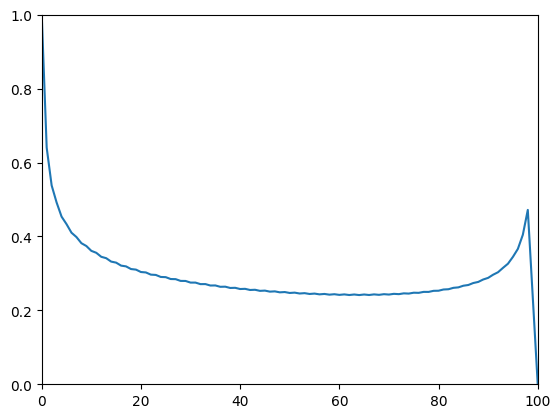

In [714]:
dat = []
ni = np.linspace(0,100,100,dtype=int)

for n in ni:

    N = np.array([i for i in range(0,n)])
    rows = [D(ni,uk,vk,k) for ni in N]
    cols = [D(-ni,uk,vk,k) for ni in N]
    dat+= [la.det(toeplitz(rows,cols))]
plot(ni,dat)
plt.ylim(0,1)
#plt.yscale("log")
plt.xlim(ni[0],ni[-1])

In [641]:
g=100000

uk = g-np.cos(k)+np.sqrt(g**2-2*g*np.cos(k)+1)
vk = np.sin(k)
norm = np.sqrt(uk**2+vk**2)
uk /= norm
vk /= norm
uk

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [625]:
def cc(u, v, k, n):  # ⟨c_i^† c_j^†⟩
    amp = np.conj(u) * np.conj(v)
    phase = np.exp(1j * k * n)
    return np.sum(amp * phase) / L

def aa(u, v, k, n):  # ⟨c_i c_j⟩
    amp = u * v
    phase = np.exp(1j * k * n)
    return np.sum(amp * phase) / L

def ca(u, v, k, n):  # ⟨c_i^† c_j⟩
    amp = np.abs(v)**2
    phase = np.exp(-1j * k * n)
    return np.sum(amp * phase) / L

def ac(u, v, k, n):  # ⟨c_i c_j^†⟩
    amp = np.abs(u)**2
    phase = np.exp(1j * k * n)
    return np.sum(amp * phase) / L


(0.0, 100.0)

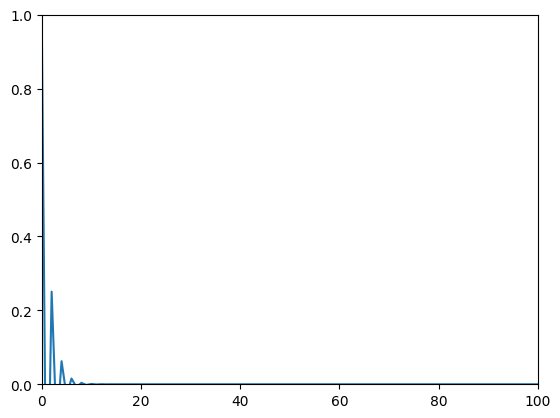

In [ ]:
def D(N,uk,vk,k):
    n = 1-N
    args = [uk,vk,n,k]
    return BA(args)

SECOND ATTEMPT


In [21]:
import numpy as np
import numpy.linalg as la
from matplotlib.pyplot import plot
import matplotlib.pyplot as plt
from itertools import combinations

from scipy.linalg import toeplitz

In [22]:
def epsilon(k,g,J=1):
    """Calculates disperson from TFIM
    inputs: k (np.array), g (float), J (float)

    returns: epsilon (np.array)
    """
    return 2*J*np.sqrt( (g-np.cos(k))**2+np.sin(k)**2)

In [300]:
def U(k, g):
    """Returns normalized eigenvectors in k space for TFIM
    inputs: k (np.array), g (float)

    returns: [u,v] where u={uk} (np.array) and v= {vk} (np.array) are the normalized eigenvectors


    Example

    U(k,inf)[0] = u = [1 , 1 , 1....]
    """
    u = g - np.cos(k) + np.sqrt(g**2 - 2 * g * np.cos(k) + 1)
    v = np.sin(k)
    norm = np.sqrt(u**2 + v**2)
    return u / norm, v / norm
def ca(U, k, l):
    """inputs: U = [u,v], k (np.array), l (integer)
    returns: np.array
    """
    #Unpack Variables
    u, v = U
    # surviving term against bogliouv vaccuum 
    amp = np.abs(v)**2
    #Fourier transform phase
    phase = np.exp(1j * k * l)
    return np.sum(amp * phase) / L
def ac(U, k, l):  
    """inputs: U = [u,v], k (np.array), l (integer)
    returns: np.array
    """
    #Unpack Variables
    u, v = U
    amp = np.abs(u)**2
    phase = np.exp(-1j * k * l)
    return np.sum(amp * phase) / L
def aa(U, k, l):
    """inputs: U = [u,v], k (np.array), l (integer)
    returns: np.array
    """
    #Unpack Variables
    u, v = U
    amp = np.conj(v) * u
    phase = np.exp(-1j * k * l)
    return -1j * np.sum(amp * phase) / L
def cc(U, k, l):
    """inputs: U = [u,v], k (np.array), l (integer)
    returns: np.array
    """
    #Unpack Variables
    u, v = U
    amp = np.conj(u) * v
    phase = np.exp(-1j * k * l)
    return 1j * np.sum(amp * phase) / L
def AA(args):
    """input: args = [U,k,l]"""
    return cc(*args)+ca(*args)+ac(*args)+aa(*args)
def BB(args):
    """input: args = [U,k,l]"""
    return aa(*args)-ac(*args)-ca(*args)+cc(*args)
def AB(args):
    """input: args = [U,k,l]"""
    return (-aa(*args)+ac(*args)-ca(*args)+cc(*args))
def BA(args):
    """input: args = [U,k,l]"""
    return (-aa(*args)-ac(*args)+ca(*args)+cc(*args))
def D(N,U,k):
    """Using Definition in 4.72 of Sachdev.
    
    N = i-j+1 but we will also set i = 0 and j=n so 
    N = 1-n"""
    n = 1-N
    args = [U,k,n]
    return BA(args)


def sigma_general(indices,T,k):
    def remove_duplicates_in_pairs(vec):
      unique_vals, counts = np.unique(vec, return_counts=True)
      filtered_vals = unique_vals[counts % 2 != 0]
      return filtered_vals.tolist()
    #Sigma matrices on different sites commute
    indices = np.sort(indices)
    #Remove any duplicates as sigma_x^2 = 1
    indices = remove_duplicates_in_pairs(indices)

    even = True
    even = False
    if len(indices)%2 == 1:
      if even ==True:
        return 0
      else:
        constant = L//2
        indices = list(indices) + [x + constant for x in indices]
        return np.sqrt(np.abs(sigma_general(indices,T,k)))
    
    #Bs sit on odd sites
    odd_sites = np.array(indices[::2])
    #As site on even sites
    even_sites= np.array(indices[1::2])
    #Get string lengths
    JW_string_lengths = even_sites-odd_sites
    #Sum of string lengths is size of matrix needed
    N = sum(JW_string_lengths)
    #Fill in indices for strings
    R = []
    for i in range(0, len(indices), 2):
        start = indices[i]
        end = indices[i+1]
        R.extend(range(start, end+1))

    A_coords = [x for x in R if x not in odd_sites]
    B_coords = [x for x in R if x not in even_sites]
    N = len(A_coords)

    # Compute first column: D(B_coords[0] - A_coords + 1)
    first_col = np.array([D(B_coords[0] - A_coords[j] + 1, T, k) for j in range(N)])

    # Compute first row: D(B_coords[i] - A_coords[0] + 1)
    first_row = np.array([D(B_coords[i] - A_coords[0] + 1, T, k) for i in range(N)])

    # Construct Toeplitz matrix
    C = toeplitz(first_col, first_row)

    return la.det(C)



def binomial_expansion(indices):
    """
    Computes the pairs of combinations of indices.
    """
    pairs = list(combinations(indices, 2))
    return pairs

def all_combinations(indices):
    """
    Computes all combinations of all lengths of indices.
    """
    x = []
    for r in range(len(indices) + 1):
        x.extend(combinations(indices, r))
    return list(x)

def unique_elements_and_frequencies(vec):
    unique_vals, freqs = np.unique(vec, return_counts=True)
    return unique_vals, freqs
from collections import Counter
def P_n(n,U,k):
    """
    P_n scales directly with the number of terms since even small odd sigma correlations need larger support to calcualte.
    Taking out odd terms works to make easier, but scaling is still 2^n.
    Minor improvements can still be had though.
    """
    #For most cases we use periodic boundary conditions
    #That said, watch out for this definition of indices
    indices = [i for i in range(0,n)]
    terms = all_combinations(indices)
    dat = []

    ###
    x_c = []
    for a in terms[1:]:
      
        a = np.array(a)
        x_c.append(tuple(a - a[0]))  # convert to tuple for hashing
    counter = Counter(x_c)

    # Extract vecs and counts as separate arrays/lists
    vecs = list(counter.keys())
    counts = np.array(list(counter.values()))

    ##

    for term in range(len(vecs)):
        dat.append(sigma_general(vecs[term],U,k)*counts[term])
    dat.append(sigma_general([],U,k))

    #All terms have equal weight. 
    return np.sum(dat)/2**n


def P_n_correlations(n,l,U,k):
    #Term 1 
    indices = [i for i in range(0,n)]
    #Term 2 
    indices +=[i for i in range(n+l,2*n+l)]
    terms = all_combinations(indices)
   # print(terms)
    dat = []
     ###
    x_c = []
    for a in terms[1:]:
      
        a = np.array(a)
        x_c.append(tuple(a - a[0]))  # convert to tuple for hashing
    counter = Counter(x_c)

    # Extract vecs and counts as separate arrays/lists
    vecs = list(counter.keys())
    counts = np.array(list(counter.values()))

    for term in range(len(vecs)):
        dat.append(sigma_general(vecs[term],U,k)*counts[term])
    dat.append(sigma_general([],U,k))
    #All terms have equal weight. 

    return np.sum(dat)/2**(2*n)#,terms


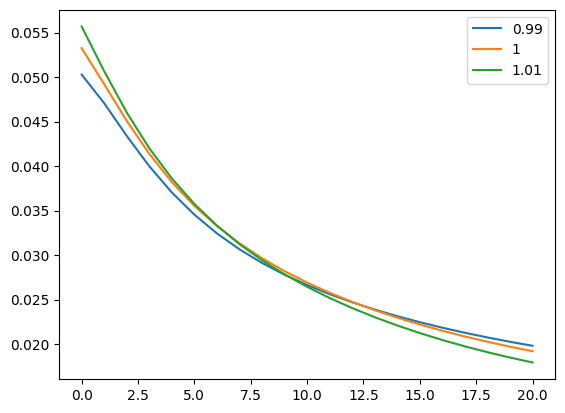

In [301]:
L = 100
n = 2

k = (2 * np.arange(-L//2, L//2) + 1) * np.pi / (L )
g = [0.99,1,1.01]
for gi in g:
    T = U(k,gi)
    dat=[]
    Lval = np.linspace(1,21,21,dtype=int)
    for Li in Lval:
        X = P_n_correlations(4,Li,T,k)-P_n(4,T,k)**2

        dat.append(X)
    plot(dat,label=f"{gi}")

plt.legend()
#plt.yscale("log")
#plt.xscale("log")

In [163]:
xdat =[ ]
ydat = []
for i in range(len(indices[0])):
    x = sigma_general(indices[0][i],T,k)
    y = sigma_general(indices[1][i],T,k)

    if y -x >0:
        print(indices[0][i])
        print(indices[1][i])
    xdat.append(x)
    ydat.append(y)

xdat = np.array(xdat)
ydat = np.array(ydat)


indices[1][-2]
print(xdat-ydat<0)


[False False False False False False False False False False False False
 False False False False]


/opt/anaconda3/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(0.0, 100.0)

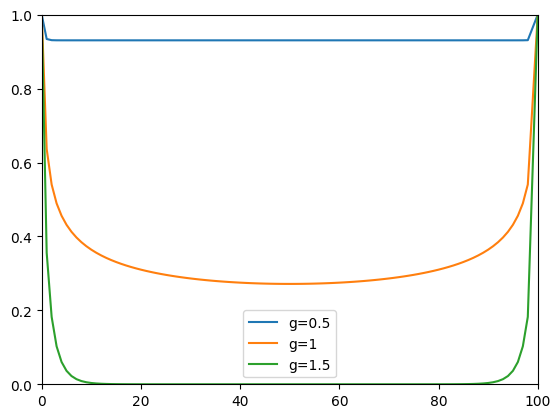

In [136]:
L = 100
n = 1
for g in [0.5,1,1.5]:
            
    k = (2 * np.arange(-L//2, L//2) + 1) * np.pi / (L )


    dat = []
    ni = np.linspace(0,L,L,dtype=int)
    T = U(k,g)

    for n in ni:

        N = np.array([i for i in range(0,n)])
        rows = [D(ni,T,k) for ni in N]
        cols = [D(-ni,T,k) for ni in N]
        dat+= [la.det(toeplitz(rows,cols))]
    plt.plot(ni,dat,label=f"g={g}")
plt.ylim(0,1)
plt.legend()
    #plt.yscale("log")
plt.xlim(ni[0],ni[-1])

# Comments

It should be noted that using the toeplitz is actually much faster than constructing the matrix numerically. I noticed a very big speed up when switching to this method. On one hand you only calculate 2*N actual values of Dn but you still need to find the det a NxN matrix scaling as (at most ) O(N^3) so I'm not sure hwere the efficiency is really coming from. Dividing the time by a factor of N, i suppose.

In [305]:
from scipy.integrate import solve_ivp
import numpy as np
def h(t,tau,h0):
    return h0*(t/tau)
# Define RHS
def rhs(t, X, k, J, h,h0, tau):
    u, v = X
    hi = h(t, tau, h0)
    du = -1j * (2 * J * (hi - np.cos(k)) * u + 2 * J * np.sin(k) * v)
    dv = -1j * (-2 * J * (hi - np.cos(k)) * v + 2 * J * np.sin(k) * u)
    return [du, dv]


In [308]:

L = 100
h0 = 3
J = 1.0
k = (2 * np.arange(-L//2, L//2) + 1) * np.pi / (L )
u0, v0 = U(k,0)
tau = 50
t_span = (0, tau)
t_eval = np.linspace(*t_span, 1000)
U_t = np.zeros((2, L, len(t_eval)), dtype=complex)

for i, k_i in enumerate(k):
    y0 = np.array([u0[i], v0[i]], dtype=complex)
    sol = solve_ivp(rhs, t_span, y0, t_eval=t_eval, args=(k_i, J, h, h0, tau), method='RK45',max_step=0.05)
        
    U_t[0, i, :] = sol.y[0]  # u_k(t)
    U_t[1, i, :] = sol.y[1]  # v_k(t)

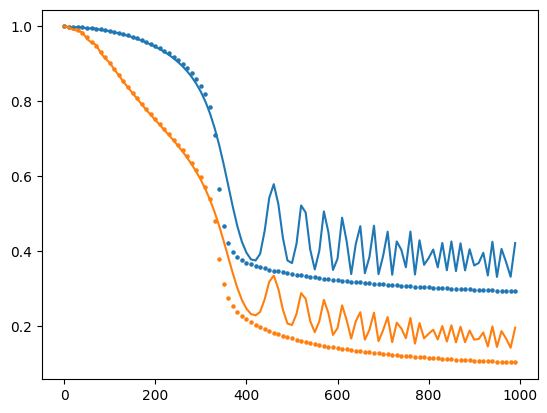

In [309]:
h_t = []
dat=[]
dat2=[]
dat3=[]
gs1=[]
gs2=[]
gs3=[]
for ti in range(0,len(t_eval),10):
    t = t_eval[ti]
    ht = h(t,tau,h0)
    h_t.append(ti)
    Ugs= U(k,ht)
    U0= U_t[:,:,ti]
    dat.append(P_n(2,U0,k))
    dat2.append(P_n(4,U0,k))
  #  dat3.append(P_n(6,U0,k))
    gs1.append(P_n(2,Ugs,k))
    gs2.append(P_n(4,Ugs,k))
 #   gs3.append(P_n(6,Ugs,k))
dat = np.array(dat)
dat2 = np.array(dat2)
gs1= np.array(gs1)
gs2 = np.array(gs2)

plot(h_t,dat)
plt.scatter(h_t,gs1,s=5)
plot(h_t,dat2)
plt.scatter(h_t,gs2,s=5)


#plt.plot(h_t,np.log(dat2/dat**2))
#plt.scatter(h_t,np.log(gs2/gs1**2),s=5)

In [226]:
from scipy.integrate import solve_ivp
import numpy as np

def h(t, tau, h0):
    return h0 * (1 - t / tau)

def rhs(t, X, k, J, h_func, h0, tau):
    u, v = X
    hi = h_func(t, tau, h0)
    du = -1j * (2 * J * (hi - np.cos(k)) * u + 2 * J * np.sin(k) * v)
    dv = -1j * (-2 * J * (hi - np.cos(k)) * v + 2 * J * np.sin(k) * u)
    return [du, dv]

def U(k, g):
    u = g - np.cos(k) + np.sqrt(g**2 - 2*g*np.cos(k) + 1)
    v = np.sin(k)
    norm = np.sqrt(u**2 + v**2)
    return u / norm, v / norm

# Parameters
L = 100
h0 = 5
J = 1.0
k_vals = (2 * np.arange(-L//2, L//2) + 1) * np.pi / L

tau_0 = 1/min(epsilon(k_vals,1))
ratios = np.linspace(0.5, 0.1, 5)  # or any number of points
taus = tau_0 / ratios


# Initial condition
u0, v0 = U(k_vals, h0)

# Allocate array: shape (2, L, T)
TRUST = []
DAT = []
for tau in taus:
    t_span = (0, tau)
    t_eval = np.linspace(*t_span, 100)
    U_t = np.zeros((2, L, len(t_eval)), dtype=complex)

    for i, k_i in enumerate(k_vals):
        y0 = np.array([u0[i], v0[i]], dtype=complex)
        sol = solve_ivp(rhs, t_span, y0, t_eval=t_eval, args=(k_i, J, h, h0, tau), method='RK45',max_step=0.05)
        U_t[0, i, :] = sol.y[0]  # u_k(t)
        U_t[1, i, :] = sol.y[1]  # v_k(t)
    DAT.append(U_t)
    args = [U_t[:,:,-1],k_vals,1]
    TRUST.append(1-BA(args))

KeyboardInterrupt: 

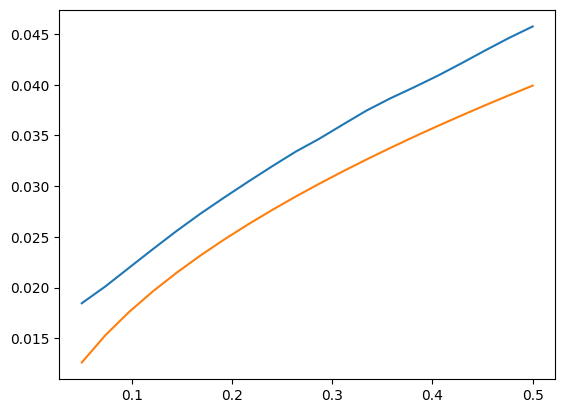

In [1098]:
plt.plot(tau_0/taus,np.array(TRUST)/2)
plt.plot(tau_0/taus,(2*taus)**(-1/2)/3.14)

# READ COMMENTS HERE KRISTIAN

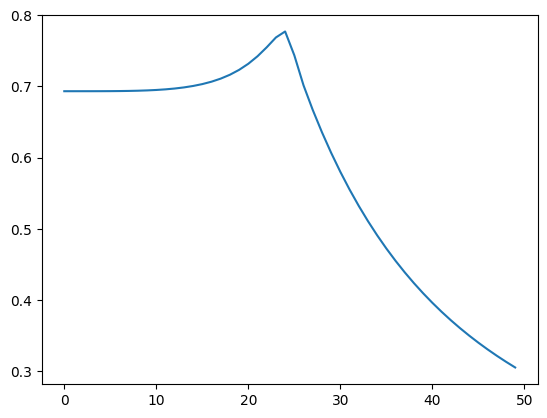

In [34]:
#Example vs h loop
L = 100
#momentum
k_vals = (2 * np.arange(-L//2, L//2) + 1) * np.pi / L
#H values
h_v = np.linspace(0,2,50)


dat=[]
dat2=[]
#loop over h
for h in h_v:
    #Generate uk, vk via exact values
    T = U(k_vals,h)    
   
    C = np.real((P_n(5,T,k_vals))) #NOTICE ORDER IS EASY BUT CAN MADE EASIER
    dat.append(C)
    C = np.real((P_n(10,T,k_vals)))
    dat2.append(C)
dat = np.array(dat)
dat2= np.array(dat2)

#plot(dat)
#plot(dat2)

plot(np.log(dat2/(dat**2)))

/opt/anaconda3/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


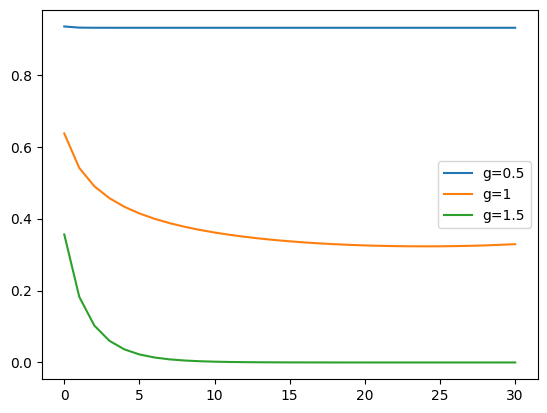

In [71]:
L = 50
n = 1
Li = 30
k = (2 * np.arange(-L//2, L//2) + 1) * np.pi / (L )
for g in [0.5,1,1.5]:
            
    


    dat = []
    ni = np.linspace(0,Li,Li,dtype=int)
    T = U(k,g)

    for n in ni:
        x= sigma_general([0,1+n],T,k)
        dat.append(x)
    plt.plot(ni,dat,label=f"g={g}")
   # if g == 1:
        #plt.plot(ni,dat[1]*ni**(-4/3))
#plt.ylim(0,1)
plt.legend()
#plt.yscale("log")
#plt.xscale("log")
#plt.xlim(ni[0],ni[-1])


[0, 1, 2, 3]


np.complex128(1.4375-1.850143573501467e-17j)

In [86]:
1/16

0.0625